#Welcome to this Colab 
where you will get a quick introduction to the Python programming language and the environment used for the course's excersises: Colab.

Colab is a Python development environment that runs in the browser using Google Cloud.


In [0]:

print("Hello World")

Hello World


Functions, Conditionals, and Interation
Let's create a Python function, and call it from a loop.

In [0]:
def HelloWorldXY(x, y):
  if (x < 10):
    print("Hello World, x was < 10")
  elif (x < 20):
    print("Hello World, x was >= 10 but < 20")
  else:
    print("Hello World, x was >= 20")
  return x + y

for i in range(8, 25, 5):  # i=8, 13, 18, 23 (start, stop, step)
  print("--- Now running with i: {}".format(i))
  r = HelloWorldXY(i,i)
  print("Result from HelloWorld: {}".format(r))

--- Now running with i: 8
Hello World, x was < 10
Result from HelloWorld: 16
--- Now running with i: 13
Hello World, x was >= 10 but < 20
Result from HelloWorld: 26
--- Now running with i: 18
Hello World, x was >= 10 but < 20
Result from HelloWorld: 36
--- Now running with i: 23
Hello World, x was >= 20
Result from HelloWorld: 46


looping  starting at 0 to 2 (exclusive) you could do any of the following

In [0]:
print("Iterate over the items. `range(2)` is like a list [0,1].")
for i in range(2):
  print(i)

print("Iterate over an actual list.")
for i in [0,1]:
  print(i)

print("While works")
i = 0
while i < 2:
  print(i)
  i += 1

Iterate over the items. `range(2)` is like a list [0,1].
0
1
Iterate over an actual list.
0
1
While works
0
1


Numpy and lists
Python has lists built into the language. However, we will use a library called numpy for this. Numpy gives you lot's of support functions that are useful when doing Machine Learning.

Here, you will also see an import statement. This statement makes the entire numpy package available and we can access those symbols using the abbreviated 'np' syntax

In [0]:
import numpy as np  # Make numpy available using np.

# Create a numpy array, and append an element
a = np.array(["Hello", "World"])
a = np.append(a, "!")
print("Current array: {}".format(a))
print("Printing each element")
for i in a:
  print(i)

print("\nPrinting each element and their index")
for i,e in enumerate(a):
  print("Index: {}, was: {}".format(i, e))

Current array: ['Hello' 'World' '!']
Printing each element
Hello
World
!

Printing each element and their index
Index: 0, was: Hello
Index: 1, was: World
Index: 2, was: !


In [0]:
print("\nShowing some basic math on arrays")
b = np.array([0,1,4,3,2])
print("Max: {}".format(np.max(b)))
print("Average: {}".format(np.average(b)))
print("Max index: {}".format(np.argmax(b)))


Showing some basic math on arrays
Max: 4
Average: 2.0
Max index: 2


In [0]:
print("\nYou can print the type of anything")
print("Type of b: {}, type of b[0]: {}".format(type(b), type(b[0])))


You can print the type of anything
Type of b: <class 'numpy.ndarray'>, type of b[0]: <class 'numpy.int64'>


In [0]:
print("\nUse numpy to create a [3,3] dimension array with random number")
c = np.random.rand(3, 3)
print(c)


Use numpy to create a [3,3] dimension array with random number
[[0.89233165 0.47640098 0.56707684]
 [0.0461012  0.7623905  0.29718951]
 [0.14071395 0.28569105 0.94191945]]


In [0]:
print("\nYou can print the dimensions of arrays")
print("Shape of a: {}".format(a.shape))
print("Shape of b: {}".format(b.shape))
print("Shape of c: {}".format(c.shape))
print("...Observe, Python uses both [0,1,2] and (0,1,2) to specify lists")


You can print the dimensions of arrays
Shape of a: (3,)
Shape of b: (5,)
Shape of c: (3, 3)
...Observe, Python uses both [0,1,2] and (0,1,2) to specify lists


Welcome to this Colab where you will train your first Machine Learning model!

We'll try to keep things simple here, and only introduce basic concepts. Later Colabs will cover more advanced problems.

The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:

f=c×1.8+32 
Of course, it would be simple enough to create a conventional Python function that directly performs this calculation, but that wouldn't be machine learning.

Instead, we will give TensorFlow some sample Celsius values (0, 8, 15, 22, 38) and their corresponding Fahrenheit values (32, 46, 59, 72, 100). Then, we will train a model that figures out the above formula through the training process.

Import dependencies
First, import TensorFlow. Here, we're calling it tf for ease of use. We also tell it to only display errors.

Next, import NumPy as np. Numpy helps us to represent our data as highly performant lists.

In [0]:
import tensorflow as tf
import numpy as np

In [0]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


Create the model
Next create the model. We will use simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

Build a layer
We'll call the layer l0 and create it by instantiating tf.keras.layers.Dense with the following configuration:

input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])  

Assemble layers into the model
Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [0]:
model = tf.keras.Sequential([l0])

Instructions for updating:
Colocations handled automatically by placer.


Compile the model, with loss and optimizer functions
Before training, the model has to be compiled. When compiled for training, the model is given:

Loss function — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".

Optimizer function — A way of adjusting internal values in order to reduce the loss.

In [0]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

#Train the model
Train the model by calling the fit method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are intially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the fit method. The first argument is the inputs, the second argument is the desired outputs. The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces.

In [0]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Instructions for updating:
Use tf.cast instead.
Finished training the model


#Display training statistics
The fit method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in fahrenheit_a.

 We'll use Matplotlib to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.

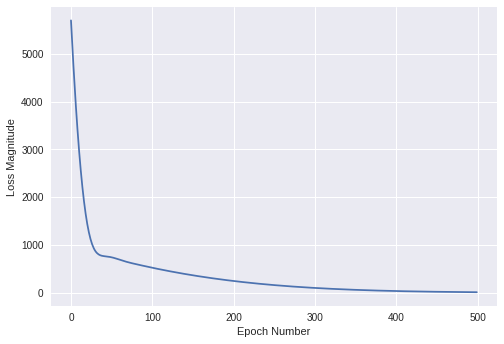

In [0]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

#Use the model to predict values
Now you have a model that has been trained to learn the relationshop between celsius_q and fahrenheit_a. You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees.

So, for example, if the Celsius value is 200, what do you think the Fahrenheit result will be? Take a guess before you run this code.

In [0]:
print(model.predict([100.0]))

[[211.29628]]


The correct answer is  100×1.8+32=212 , so our model is doing really well.

To review
We created a model with a Dense layer
We trained it with 3500 examples (7 pairs, over 500 epochs).
Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)

#Looking at the layer weights
Finally, let's print the internal variables of the Dense layer.

In [0]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8261648]], dtype=float32), array([28.6798], dtype=float32)]



The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as the equation for a line,  y=mx+b , which has the same form as the conversion equation,  f=1.8c+32 .

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.

#A little experiment
what if we created more Dense layers with different units, which therefore also has more variables?#

In [0]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74742]]
Model predicts that 100 degrees Celsius is: [[211.74742]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.13362625,  0.5065075 , -0.13029625, -0.70488226]],
      dtype=float32), array([ 2.2357044,  3.6956604,  3.1077297, -3.7214885], dtype=float32)]
These are the l1 variables: [array([[-0.16325384,  0.7285359 , -0.9309261 ,  0.86233747],
       [-0.17102645,  0.13237724, -0.89740765, -0.7181777 ],
       [-0.967104  ,  0.21234803, -0.0608313 , -0.14249347],
       [ 0.37442204, -0.69806486,  0.45057794, -0.4005088 ]],
      dtype=float32), array([-3.6431444,  3.3128147, -3.6053236,  1.2229304], dtype=float32)]
These are the l2 variables: [array([[-0.9187365 ],
       [ 0.8412457 ],
       [-1.1714    ],
       [ 0.03290338]], dtype=float32), array([3.556005], dtype=float32)]


#know what the following terms are:

Feature: The input(s) to our model

Examples: An input/output pair used for training

Labels: The output of the model

Layer: A collection of nodes connected together within a neural network.

Model: The representation of your neural network

Dense and Fully Connected (FC): Each node in one layer is connected to each node in the previous layer.

Weights and biases: The internal variables of model

Loss: The discrepancy between the desired output and the actual output

MSE: Mean squared error, a type of loss function that counts a small 

number of large discrepancies as worse than a large number of small ones.

Gradient Descent: An algorithm the internal variables a bit at a time to 
gradually reduce the loss function.

Optimizer: A specific implementation of the gradient descent algorithm. 
(There are many algorithms for this. In this course we will only use the “Adam” Optimizer, which stands for ADAptive with Momentum. It is considered the best-practice optimizer.)

Learning rate: The “step size” for loss improvement during gradient descent.

Batch: The set of examples used during training of the neural network

Epoch: A full pass over the entire training dataset

Forward pass: The computation of output values from input

Backward pass (backpropagation): The calculation of internal variable
adjustments according to the optimizer algorithm, starting from the output layer and working back through each layer to the input.

Flattening: The process of converting a 2d image into 1d vector

ReLU: An activation function that allows a model to solve nonlinear problems

Softmax: A function that provides probabilities for each possible output class

Classification: A machine learning model used for distinguishing among two or more output categories